# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"
data.head(1)

Wholesale customers dataset has 440 samples with 6 features each.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


/Users/spandan.chakraborty/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


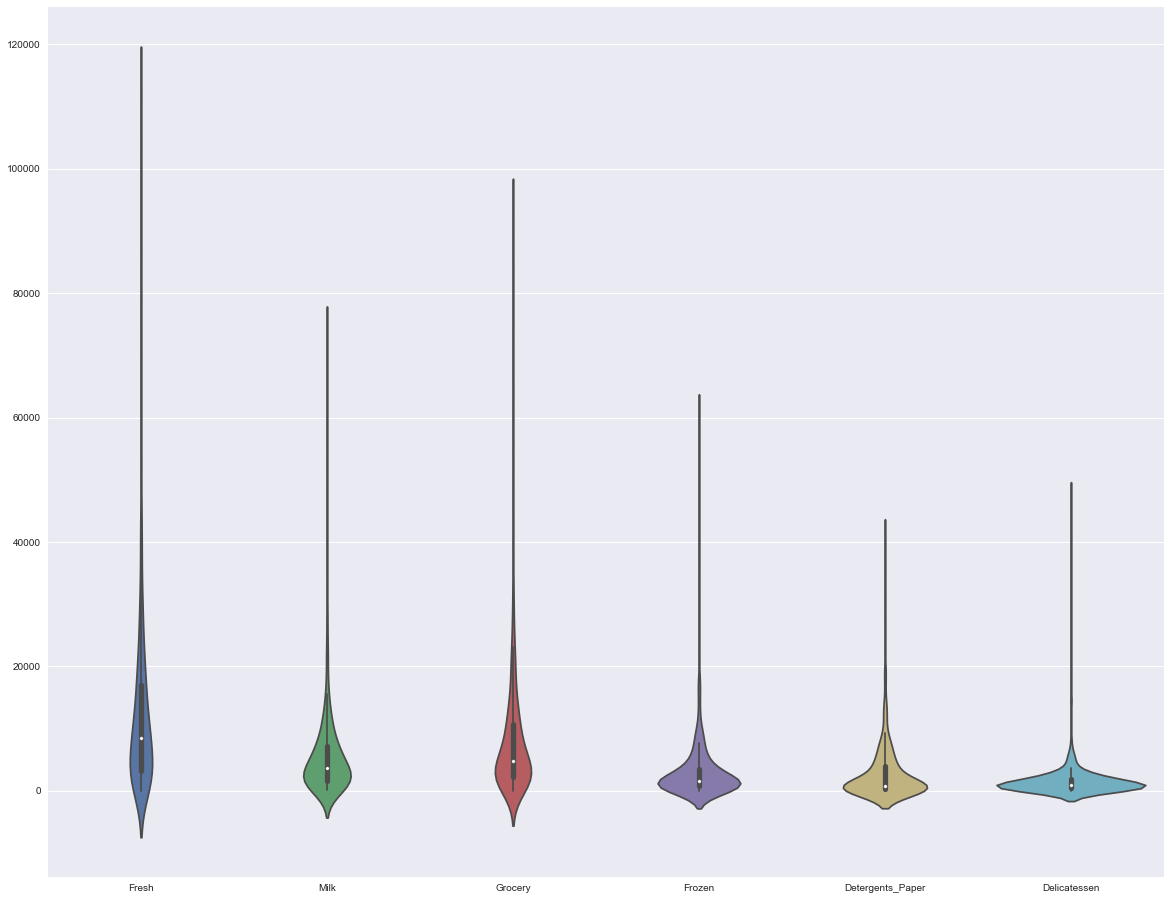

In [3]:
import matplotlib.pylab as pylab
#sns.set(style='whitegrid')
pylab.rcParams['figure.figsize'] = 20, 16  # that's default image size for this 
sns.violinplot(data)

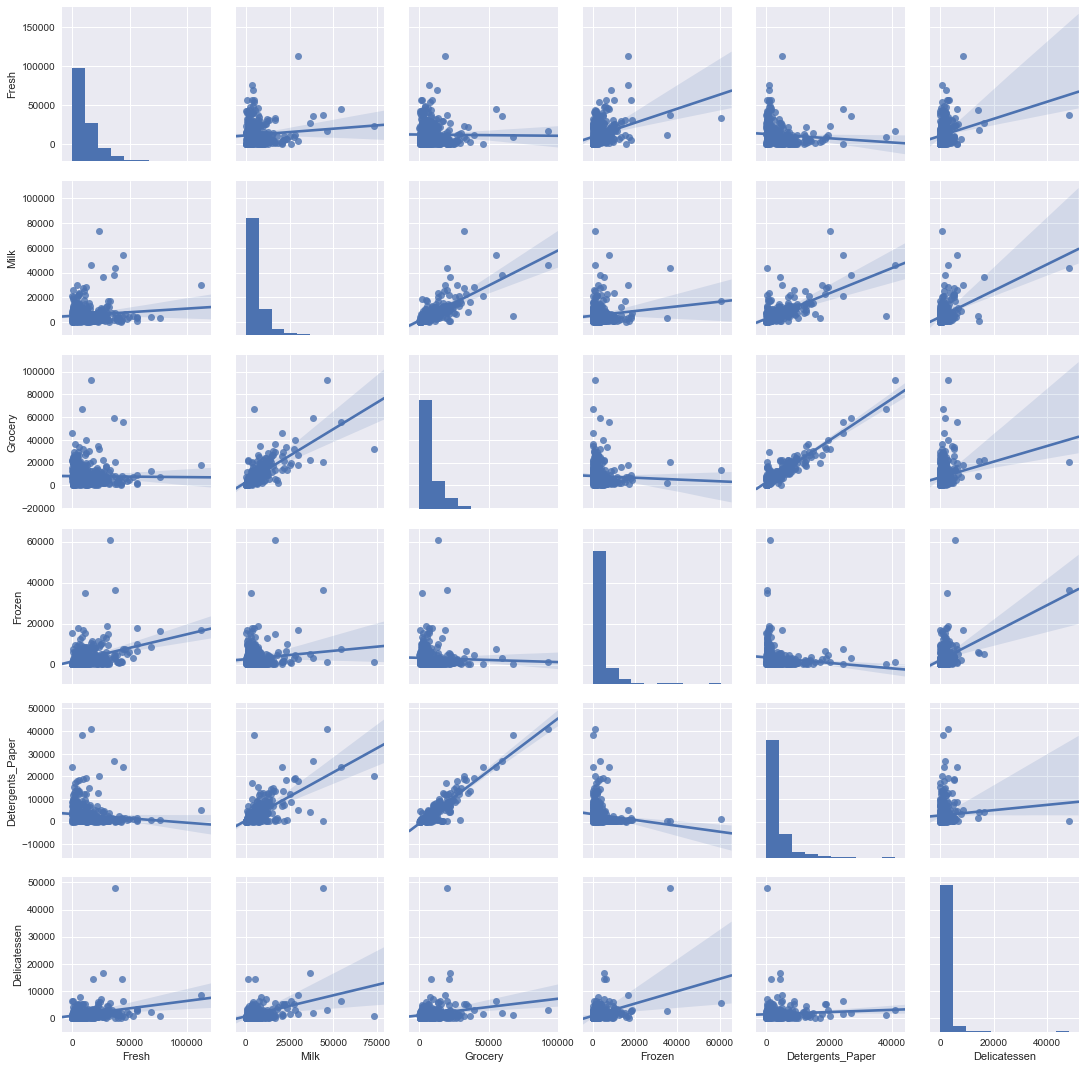

In [4]:
sns.pairplot(data, kind='reg')

In [6]:
corr=data.corr()
#display(corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
pylab.rcParams['figure.figsize'] = 10, 8  # that's default image size for this 

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [7]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [150,200,400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16225,1825,1765,853,170,1067
1,3067,13240,23127,3941,9959,731
2,4446,906,1238,3576,153,1014


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
<ul>
<li><b>iloc=150</b><br>Has bought higher m.u. of fresh, relatively lesser m.u of Milk, grocery, frozen etc..<br>
May be it is a Fresh Market or Farmers market sort of entity<p></p></li>
<li><b>iloc=200</b><br>Has bought higher m.u. of Grocery and Milk, relatively lesser m.u of Fresh, Frozen, Delicatessen etc..<br>
May be it is a Grocery store , retailer <p></p></li>
<li><b>iloc=400</b><br>Has bought moderate  m.u. of Fresh and Frozen and reatively lesser Milk, Grocery etc etc..<br>
May be it is a Cafe/Restaurant<p></p></li>
</ul>

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
# Looping through the Column Headers to find what Category  predicts better purchasing of other categories. 
score_dict={}
headers=list(data.keys())
for c in headers:
    drop_lbl=c
    new_data = data.drop(labels=drop_lbl, axis=1)
    X_all=new_data
    y_all=data[drop_lbl]
    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.25, random_state=5)
    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=5)
    regressor.fit(X_train,y_train)
    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test,y_test)
    score_dict[c]=score
    
scoreData=pd.DataFrame(score_dict.items(), columns=['Target Label','Score'])
scoreData.set_index('Target Label', inplace=True)
display(scoreData.sort_values(by='Score', ascending=False))

,Score
Target Label,
Detergents_Paper,0.672581
Grocery,0.656050
Fresh,-0.343402
Frozen,-0.409011
Milk,-0.755009
Delicatessen,-1.280015


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

***From the Correlation Heat map it seems Detergent Paper buying is stongly correlated with buying of Milk and Grocery.
Hence I attempted to predict "Detergents_Paper".***

However out of curiosity I have tried to predict for all Categories.

As per the Dataset we have  the Regression model predicts highest R2 score for "Detergents_Paper".

<b>But the R2 score is not high enough to discard the feature  as less relevant for our analysis. Hence I will consider this feature to prdict Customer spedning habbits in my model.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

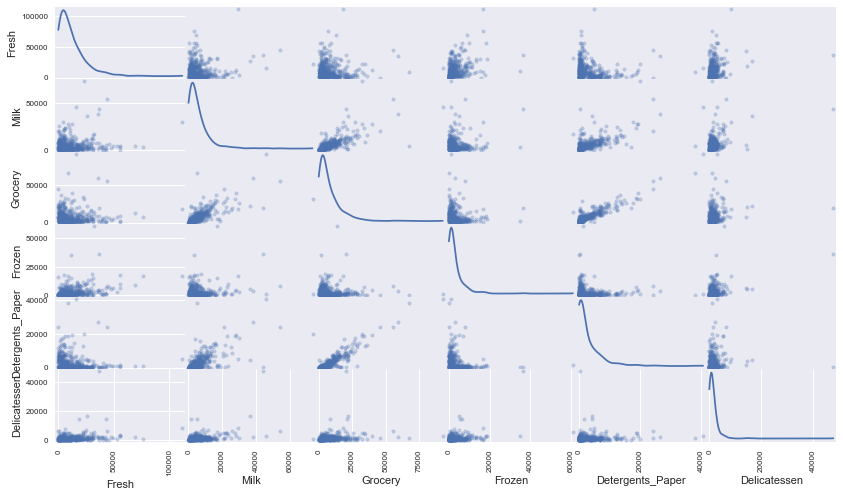

In [9]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

Grocery-Detergent_paper shows strong correlation. 
Milk-Grocery as well indicates some correlation but it is not as evident as Grocery-Detergent-Paper.

It confirms the suspicion of relevance the Detergent_Paper feature.

The data is positively skewed for almost all the categories with most of the data elements concentrated on left hand side of PDF with long tails on right. Hence we can conclude that data is not normally distributed.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

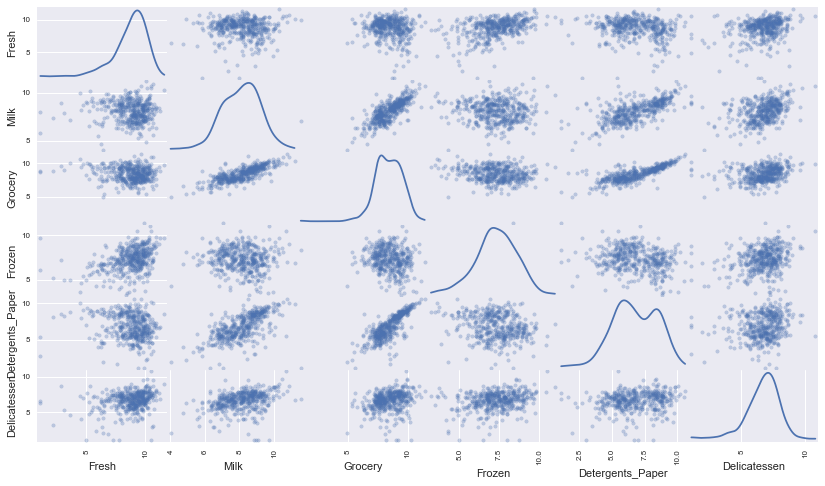

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x))
#display(log_samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.694309,7.509335,7.475906,6.74876,5.135798,6.972606
1,8.028455,9.490998,10.048756,8.27919,9.206232,6.594413
2,8.399760,6.809039,7.121252,8.18200,5.030438,6.921658


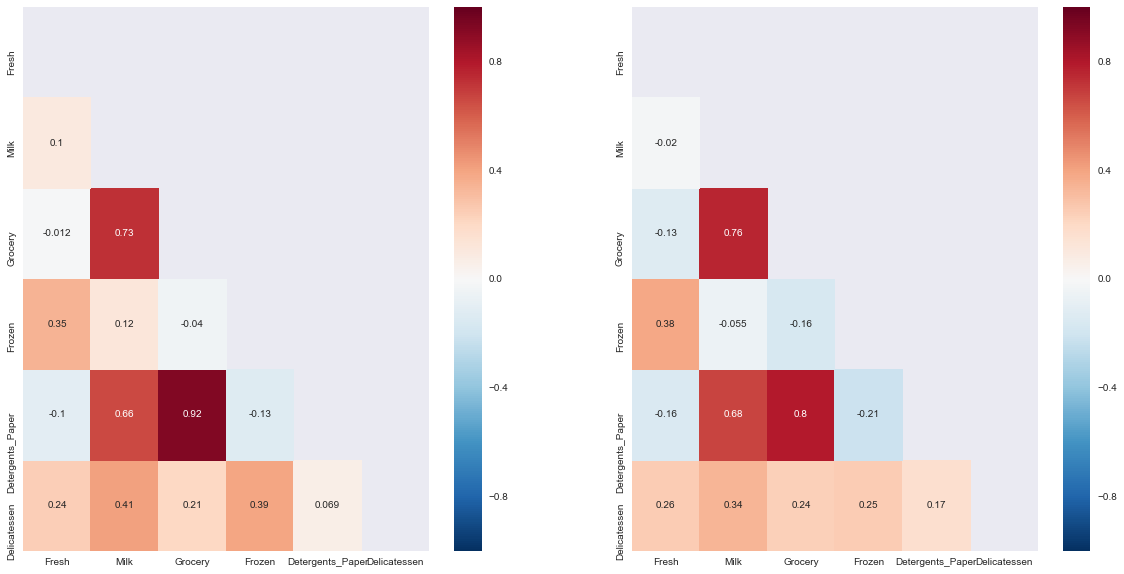

In [11]:
# Display the log-transformed sample data
#import matplotlib.pyplot as plt
display(log_samples)
corr_log=log_data.corr()
mask2=np.zeros_like(corr_log)
mask2[np.triu_indices_from(mask2)] = True
fig=plt.figure(figsize = (20,10))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
sns.heatmap(corr, mask=mask,annot=True, ax=ax1, label='orginial Data')
sns.heatmap(corr_log, mask=mask2, annot=True, ax=ax2, label='Log Transformed')

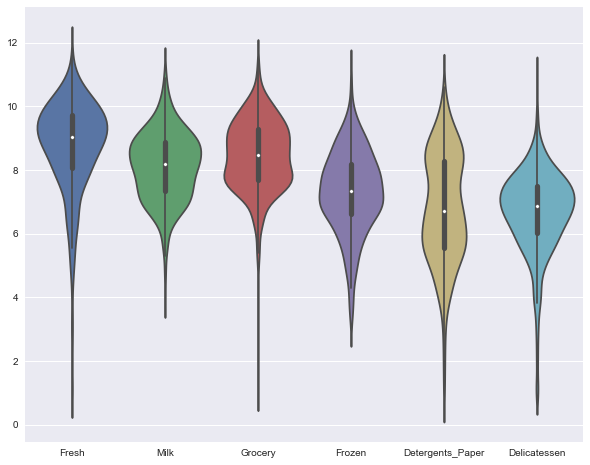

In [12]:
sns.violinplot(log_data, annot=True)

***The Correlation has not changed much after Data transformation (applying natural log)***

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
# For each feature find the data points with extreme high or low values
#del frames
frames=[]
#frames_2=[]
temp_pd=pd.DataFrame()
#outliers_df=log_data.copy(deep=False)
for feature in log_data.keys():
    outliers1=pd.DataFrame()
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature].values, 25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature].values, 75)

    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)

    # Display the outliers
    #print "Data points considered outliers for the feature '{}':".format(feature)
    #display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    temp_pd=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].copy()
    outliers1[feature]=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))][feature]
    frames.append(outliers1)
    #frames_2.append(temp_pd)
    #display(outliers1)

In [14]:
#Display only those Data points that are Condiered as Ouliers for respective features.. out side 1.5* IQR
results=pd.concat(frames, axis=1)
print(results.shape)
display(results.head(10))
outliers  = results.index.values.tolist()

(42, 6)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,NaN,NaN,NaN,3.496508,NaN,NaN
57,NaN,NaN,NaN,3.637586,NaN,NaN
65,4.442651,NaN,NaN,3.583519,NaN,NaN
66,2.197225,NaN,NaN,NaN,NaN,3.295837
75,NaN,NaN,1.098612,NaN,1.098612,NaN
81,5.389072,NaN,NaN,NaN,NaN,NaN
86,NaN,11.205013,NaN,NaN,NaN,NaN
95,1.098612,NaN,NaN,NaN,NaN,NaN
96,3.135494,NaN,NaN,NaN,NaN,NaN
98,NaN,4.718499,NaN,NaN,NaN,NaN


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
<p>Yes there are few datapoints which are considered to be outlier for multiple features (for example index# 128, it is outlier for two features: Fresh and Deli).</p>
<br>** Should we remove Outliers**
<p>Well that depends on what garanularity of clustering we are after. There may be a customer segment which are represented what we may have identified as outliers. For example in Enron Data set the outliers were typically the persons of interest. On the contrary some may argue the outliers are simply noise and may affect clustering algorithms like k-means</p>
<p>In this case I assume we are after identifying broad customer segment. There are 42 records considered to be outlier which is roughly 1% of the dataset. I will go ahead and drop these outliers</p>

In [15]:
# OPTIONAL: Select the indices for data points you wish to remove
#display(log_data.iloc[results.index.tolist()])
# Remove the outliers, if any were specified
good_data = log_data.drop(results.index.tolist()).reset_index(drop = True)
good_data.shape
display(good_data.head(2))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[[-1.89124939  0.00590885 -0.34306806  1.15199654 -0.05858521 -0.19385463]
 [ 3.08202637  0.13142075  0.39940964 -1.41974694  0.47468929  0.22631498]
 [-2.48420644 -0.01472695  0.90046145 -0.33151551 -0.51469873  0.03568245]]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119


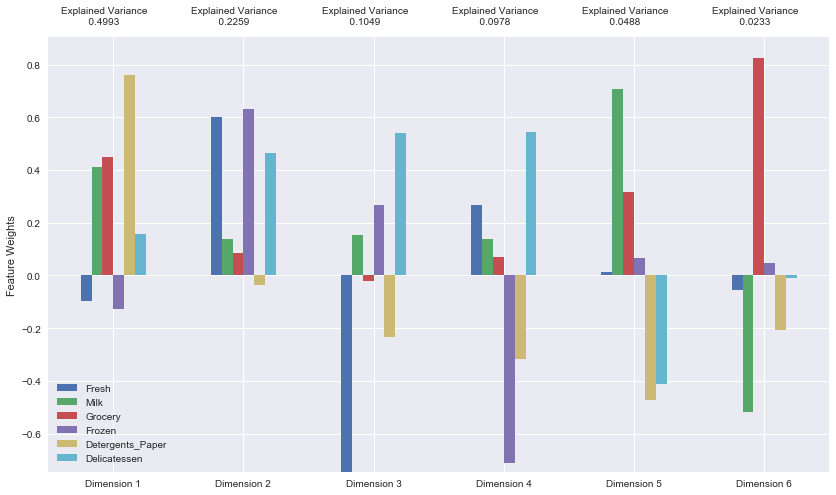

In [16]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(random_state=1)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)
print (pca_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
display(good_data.head(2))

#sns.pairplot(data=good_data[['Detergents_Paper','Grocery']])
#sns.pairplot(data=pca.transform(good_data[['Detergents_Paper','Grocery']]))

In [17]:
lst=pca.explained_variance_ratio_
# Variance Explained by 1st 2 PCs:
print(lst[0]+lst[1])
# Variance explained by 1st 4 PCs:
print(lst[0]+lst[1]+lst[2]+lst[3])

0.725252904866
0.927953605231


### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
By the first and second PCs explains 0.725 variance in data
By the first four PCs explains 0.927 variance in data

As per the visualization above:
<br><b>1st PC explains almost 50% variance in data.</b><br>
The prominent fetaures which has variance along 1st PC are  Milk, Grocery and Detergent_paper. It also shows positive covariance between spending in Milk, Grocery and Detergent_paper. Since PC1 represents most variance, we can infer that customer spending in Milk, Grocery and Detergent_paper are positively correlated. 

<br><b>PC2 expalins 22.5% Variance of data</b><br>
The prominent fetaures which has variance along 2nd PC are customer spending in  Fresh,Frozen & Deli. Since PC1 and PC2 are orthogonal, we can infer there is less correlation between Spending on "Fresh/Forozen & Deli" vis-a vis spending on "Milk, Grocery and Detergent_paper".

<br><b>PC3 explains 10% variation of data </b><br>
It is composite of Fresh, Frozen, Deli, Detergent. It shows a negative co variance of spending between Fresh & Deli. Since the it repersents a small variation of data I will not infer much from PC3.

<br><b>PC4 exaplains less than 1% of data variance</b><br>
It is a composite feature of Frozen, Detergent and Deli. Since ut represents such a small variance of data , I will not infer much from PC4

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [18]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.8912,0.0059,-0.3431,1.1520,-0.0586,-0.1939
1,3.0820,0.1314,0.3994,-1.4197,0.4747,0.2263
2,-2.4842,-0.0147,0.9005,-0.3315,-0.5147,0.0357


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [19]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca1 = PCA(n_components=2, random_state=1)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca1.fit_transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca1.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
#sns.pairplot(data=reduced_data)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [20]:
# Display sample log-data after applying PCA transformation in two dimensions
reduced_samples=pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2'])
display(reduced_samples)


,Dimension 1,Dimension 2
0,-1.8912,0.0059
1,3.0820,0.1314
2,-2.4842,-0.0147


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

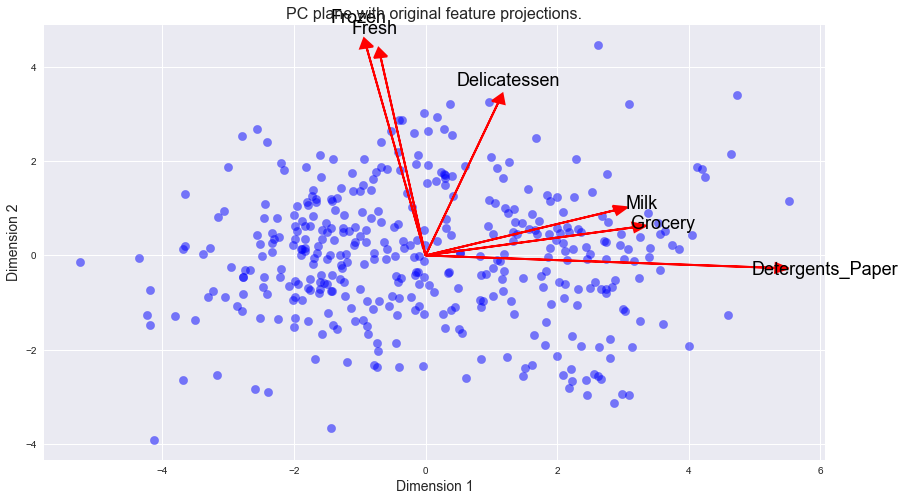

In [21]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

The most Strongly correlated fetaures with dimension1/PC1 are  Detergent/Grocery & Milk.
The most Strongly correlated fetaures with dimension2/PC2 are  Frozen & Fresh.

The observation agrees with pca_results plot obtained earlier

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
<br>** K Means**
<ul>
<li>K Means is one of the simplest algorithm</li>
<li>Relatively less expensive than other clustering algorithms like EM, hence can be applied on large dataset to get preliminary clustering</li>
<li>It is typically used as pre clustering step for other clustering algorithms</li>
</ul>

<br>** Gaussian Mixture Model**
<ul>
<li>with GMM a try to find probablity of a data point being part of a cluster, we are not hard casing a data point to a cluster (which K mean does)</li>
<li>End user can decide what probability threshold to consider for clustering </li>
<li>K means is actaully a special case of GMM</li>
</ul>
<br> ** will ise K means for our use case**
<p>Since K means is the simplest  algorithm to explore clustering</p>

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

{2: 0.447157742293467, 3: 0.3639864798401739, 4: 0.33115095428456554, 5: 0.35133264224863908, 6: 0.36364993171283438, 7: 0.3558373920722826, 8: 0.37793308476849474, 9: 0.36751569838579834, 10: 0.33316256178047815, 11: 0.35591696972848053, 12: 0.3552509925255225}


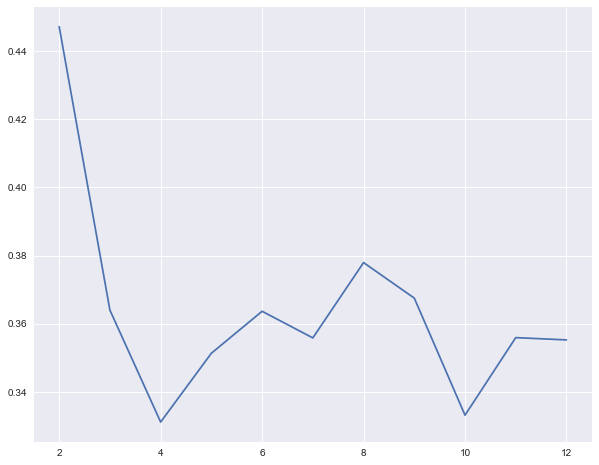

In [22]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
# TODO: Apply your clustering algorithm of choice to the reduced data
n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12]
score_dict={}
for n in n_clusters:
    clusterer = KMeans(random_state=1,n_clusters=n)
    clusterer.fit(reduced_data)


    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(reduced_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    score_dict[n]=score
print(score_dict)
l=sorted(score_dict.items())
x,y=zip(*l)
plt.plot(x,y)
plt.show()

In [23]:
# Best Cluster:
clusterer_best = KMeans(random_state=1,n_clusters=2)
clusterer_best.fit(reduced_data)


# TODO: Predict the cluster for each data point
preds1 = clusterer_best.predict(reduced_data)
#display(preds1)

# TODO: Find the cluster centers
centers1 = clusterer_best.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer_best.predict(reduced_samples)

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
Tried the score for 1 to 12 clusters. The best score is for 2 clusters

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

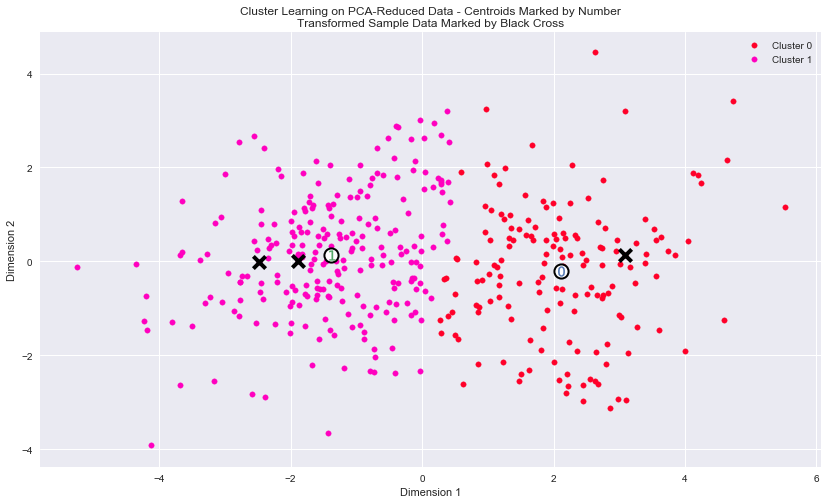

In [24]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds1, centers1, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [25]:
pd.options.display.float_format = '{:,.1f}'.format # formats panda display 
# TODO: Inverse transform the centers
log_centers = pca1.inverse_transform(centers1)
#print(log_centers)
# TODO: Exponentiate the centers
true_centers =np.exp(log_centers)
#print(true_centers)
# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers1))]
#print segments
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
true_centers['Total Spend']=true_centers.sum(axis=1) # add a total of degment center spending
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend
Segment 0,"5,424.0","7,780.0","11,532.0","1,123.0","4,444.0","1,136.0","31,439.0"
Segment 1,"9,451.0","1,938.0","2,449.0","2,200.0",307.0,771.0,"17,116.0"


In [235]:
#true_centers.T.plot(kind='bar')

,count,mean,std,min,25%,50%,75%,max
Fresh,398.0,"12,430.6","12,552.7",255.0,"4,043.5","9,108.0","16,969.0","112,151.0"
Milk,398.0,"5,486.3","6,410.9",201.0,"1,597.3","3,611.5","6,802.5","54,259.0"
Grocery,398.0,"7,504.9","9,263.8",223.0,"2,125.0","4,573.0","9,762.2","92,780.0"
Frozen,398.0,"3,028.8","3,712.6",91.0,830.0,"1,729.5","3,745.0","35,009.0"
Detergents_Paper,398.0,"2,725.4","4,644.0",5.0,263.3,788.0,"3,660.5","40,827.0"
Delicatessen,398.0,"1,454.7","1,746.5",46.0,448.3,997.5,"1,830.0","16,523.0"
Total Spend,398.0,"32,630.8","24,661.2","2,158.0","17,554.7","27,394.5","39,860.2","199,891.0"


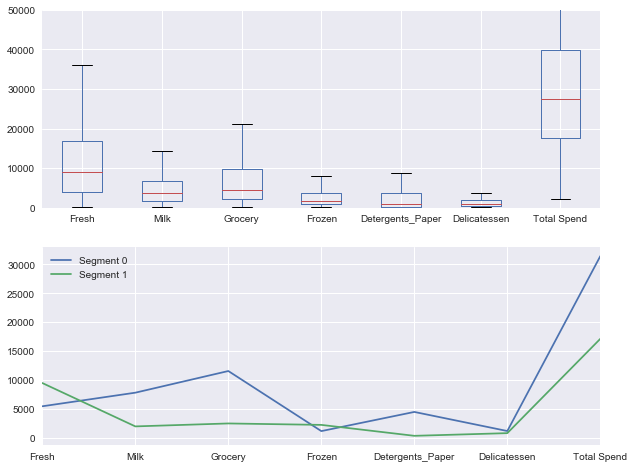

In [26]:
import matplotlib.cm as cm
#display(data[].describe())
good_data_un_logged=good_data.apply(lambda x: np.exp(x))
#display(good_data_un_logged.head(1))
good_data_un_logged['Total Spend']=good_data_un_logged.sum(axis=1)
data_stats=pd.DataFrame(good_data_un_logged.describe().T)
display(data_stats)

def pltresults(dataset,seg_center):
    fig, (ax1, ax2) = plt.subplots(2)#,sharex=True, sharey=True,
    ax1.set_ylim(0,50000)
    good_data_un_logged.boxplot(ax=ax1)#ax=ax
    true_centers.T.plot(ax=ax2)
    
    # add the Data points from Segment Centers
       
pltresults(data_stats,true_centers)

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**


***Segment:0***
<br>Customer spending:
<ul>
<li><b>Fresh: </b>Spends less than mean spend of sample population</li>
<li><b>Milk: </b>Spends more than mean spend of sample population</li>
<li><b>Grocery: </b>Spends more than mean spend of sample population</li>
<li><b>Frozen: </b>Spends less than mean spend of sample population</li>
<li><b>Detergent: </b>Spends more than mean spend of sample population</li>
<li><b>Deli: </b>Spends less than mean spend of sample population</li>
<li><b>Total Spend: </b>Total Spend is near to mean total spend of sample population</li>
</ul>
<p>The total spend and the high spending after Milk, Grocery, Detergent-papers indicates this segment may represnt SuperMarkets , Grocery retailers</p>
<br>

***Segment:1***
<br>Customer spending:
<ul>
<li><b>Fresh: </b>Spends more than mean spend of sample population</li>
<li><b>Milk: </b>Spends less than mean spend of sample population</li>
<li><b>Grocery: </b>Spends less than mean spend of sample population</li>
<li><b>Frozen: </b>Spends less than mean spend of sample population</li>
<li><b>Detergent: </b>Spends less than mean spend of sample population</li>
<li><b>Deli: </b>Spends less than mean spend of sample population</li>
<li><b>Total Spend: </b>Total Spend is much less than mean total spend of sample population</li>
</ul>
<p>The lower total spend and the high spending after Fresh, Frozen indicates this segment may represnt Restaurants, Cafes</p>

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [27]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
display(samples)
display(true_centers)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16225,1825,1765,853,170,1067
1,3067,13240,23127,3941,9959,731
2,4446,906,1238,3576,153,1014


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend
Segment 0,"5,424.0","7,780.0","11,532.0","1,123.0","4,444.0","1,136.0","31,439.0"
Segment 1,"9,451.0","1,938.0","2,449.0","2,200.0",307.0,771.0,"17,116.0"


**Answer:**
<ol>
<li>Sample 1: High spending in Fresh (above mean) and low spending in Milk, Grocery and Detergent_papers makes it candidate for member of segment 1 as correctly predicted </li>
<li>Sample 2: High spending in Milk, Grocery and Detergent (above mean) and comparitevly low spending in Fresh, Frozen  makes it candidate for member of segment 0 as correctly predicted </li>
<li>Sample 1: Relatively High spending in Fresh, Frozen compared to spending in Milk, Grocery and Detergent_papers makes it candidate for member of segment 1 as correctly predicted </li>
</ol>

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
No the change will not affect all customers equally.

We have broadly two customer segments based on their spending in certain group of products. 

<b>Segment 1 :</b> Spends more on Fresh and Frozen. Their overall spending is lesser than the another segment.
I am assuiming these are Cafes, Restuarants. 
3 days a week delivery service may not be acceptable for these customers. Specially since their demand for fresh items will require more frequent delivery. Also assuming these customers have lesser ability to store Fresh & Frozen items for long to accomodate 3 days a week delivery from 5 days a week delivery.

<b>However for Segment 0 :</b> The customer spends more on Grocery, Milk ,Detergent_papers and their total spending is much more than the other segment. Assuming these are reatailers, super markets, they have better storage for Grocery/Detergent and better ability to store and handle milk/fresh/frozen. For these customer segment 5 days a week to 3 days a week delivery schedule change may become cost effective

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
The target variable for a Supervised Learner will be the Customer Segment. We can predict whether the new customers belongs to existing customer segments. This can be derived using KNN and SVM classifiers.
However as more and more customers are added the clustering has to be revisited time to time to see if any new customer segment emerges from the unlabeled data.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

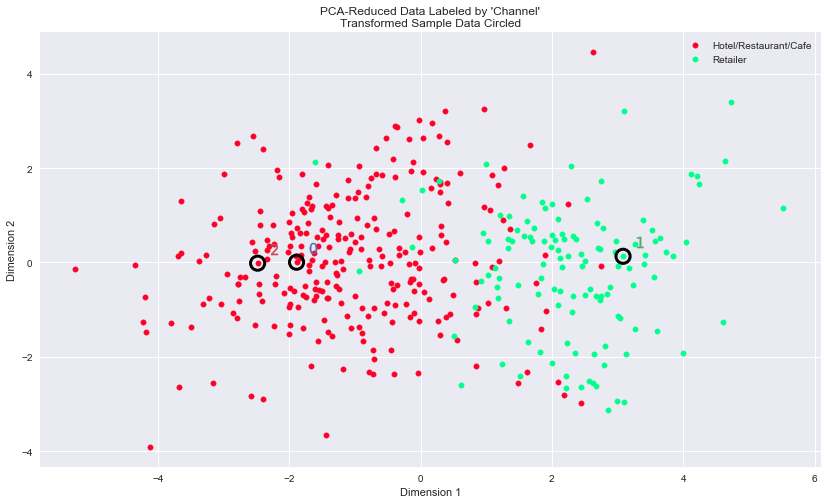

In [28]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

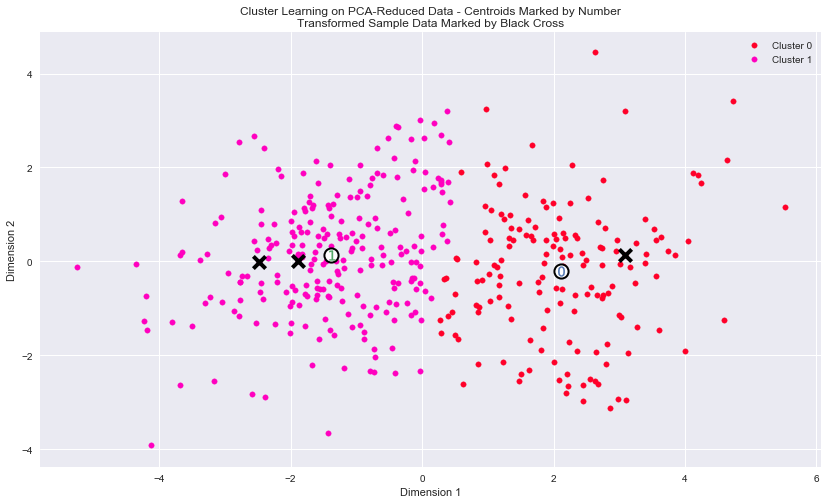

In [29]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds1, centers1, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
I will say the clustering algorithm has done good job in identifying the Customer segments compared to actual segmentation (Ho/Re/Ca Vs Retailers) which were hidden.

As per the real data labels there are few Ho/Re/Ca pretty close to the center of reatiler segment center. May be they are big on Grocery/Milk consumption. So going by this distribution it is hard to purely classify Retailers Vs Ho/Re/Ca/ However as we move to far left or on far right the confidence of one or the other classification will go high.

I will say the clssdifications are consistent with previous definition of customer segments.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.